<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/02-clustering/Clustering_California_Housing_phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

#Finding Patterns in The Housing Market

In this notebook, we will try to do clustering analysis of California housing market. We would like to find some trends in the housing market there.

In [108]:
import seaborn as sns
sns.set_palette("pastel")

## Load the data

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/elhamod/BA820/refs/heads/main/Hands-on/02-clustering/Kaggle_housing.csv"
#https://www.kaggle.com/datasets/camnugent/california-housing-prices

df = pd.read_csv(url) # if you you are only interested in certain attributes: usecols = [...])

df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

Attribute meanings:

**longitude:** A measure of how far west a house is; a higher value is farther west.

**latitude:** A measure of how far north a house is; a higher value is farther north.

**housingMedianAge:** Median age of a house within a block; a lower number is a newer building.

**totalRooms:** Total number of rooms within a block.

**totalBedrooms:** Total number of bedrooms within a block.

**population:** Total number of people residing within a block.

**households:** Total number of households, a group of people residing within a home unit, for a block.

**medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars).

**medianHouseValue:** Median house value for households within a block (measured in US Dollars).

**oceanProximity:** Location of the house w.r.t ocean/sea.

## Data preprocessing and understanding

Let's check if there are any null values and fix that.

In [2]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
df = df.dropna() # or one could replace the null values with some reasonable value. df.total_bedrooms.fillna(2, inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Let's further understand these values. Any issues you can spot?

In [4]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

Notice how the range of values for different attributes is very different. Let's keep that in mind.

Let's look at the relaionship between different attributes.

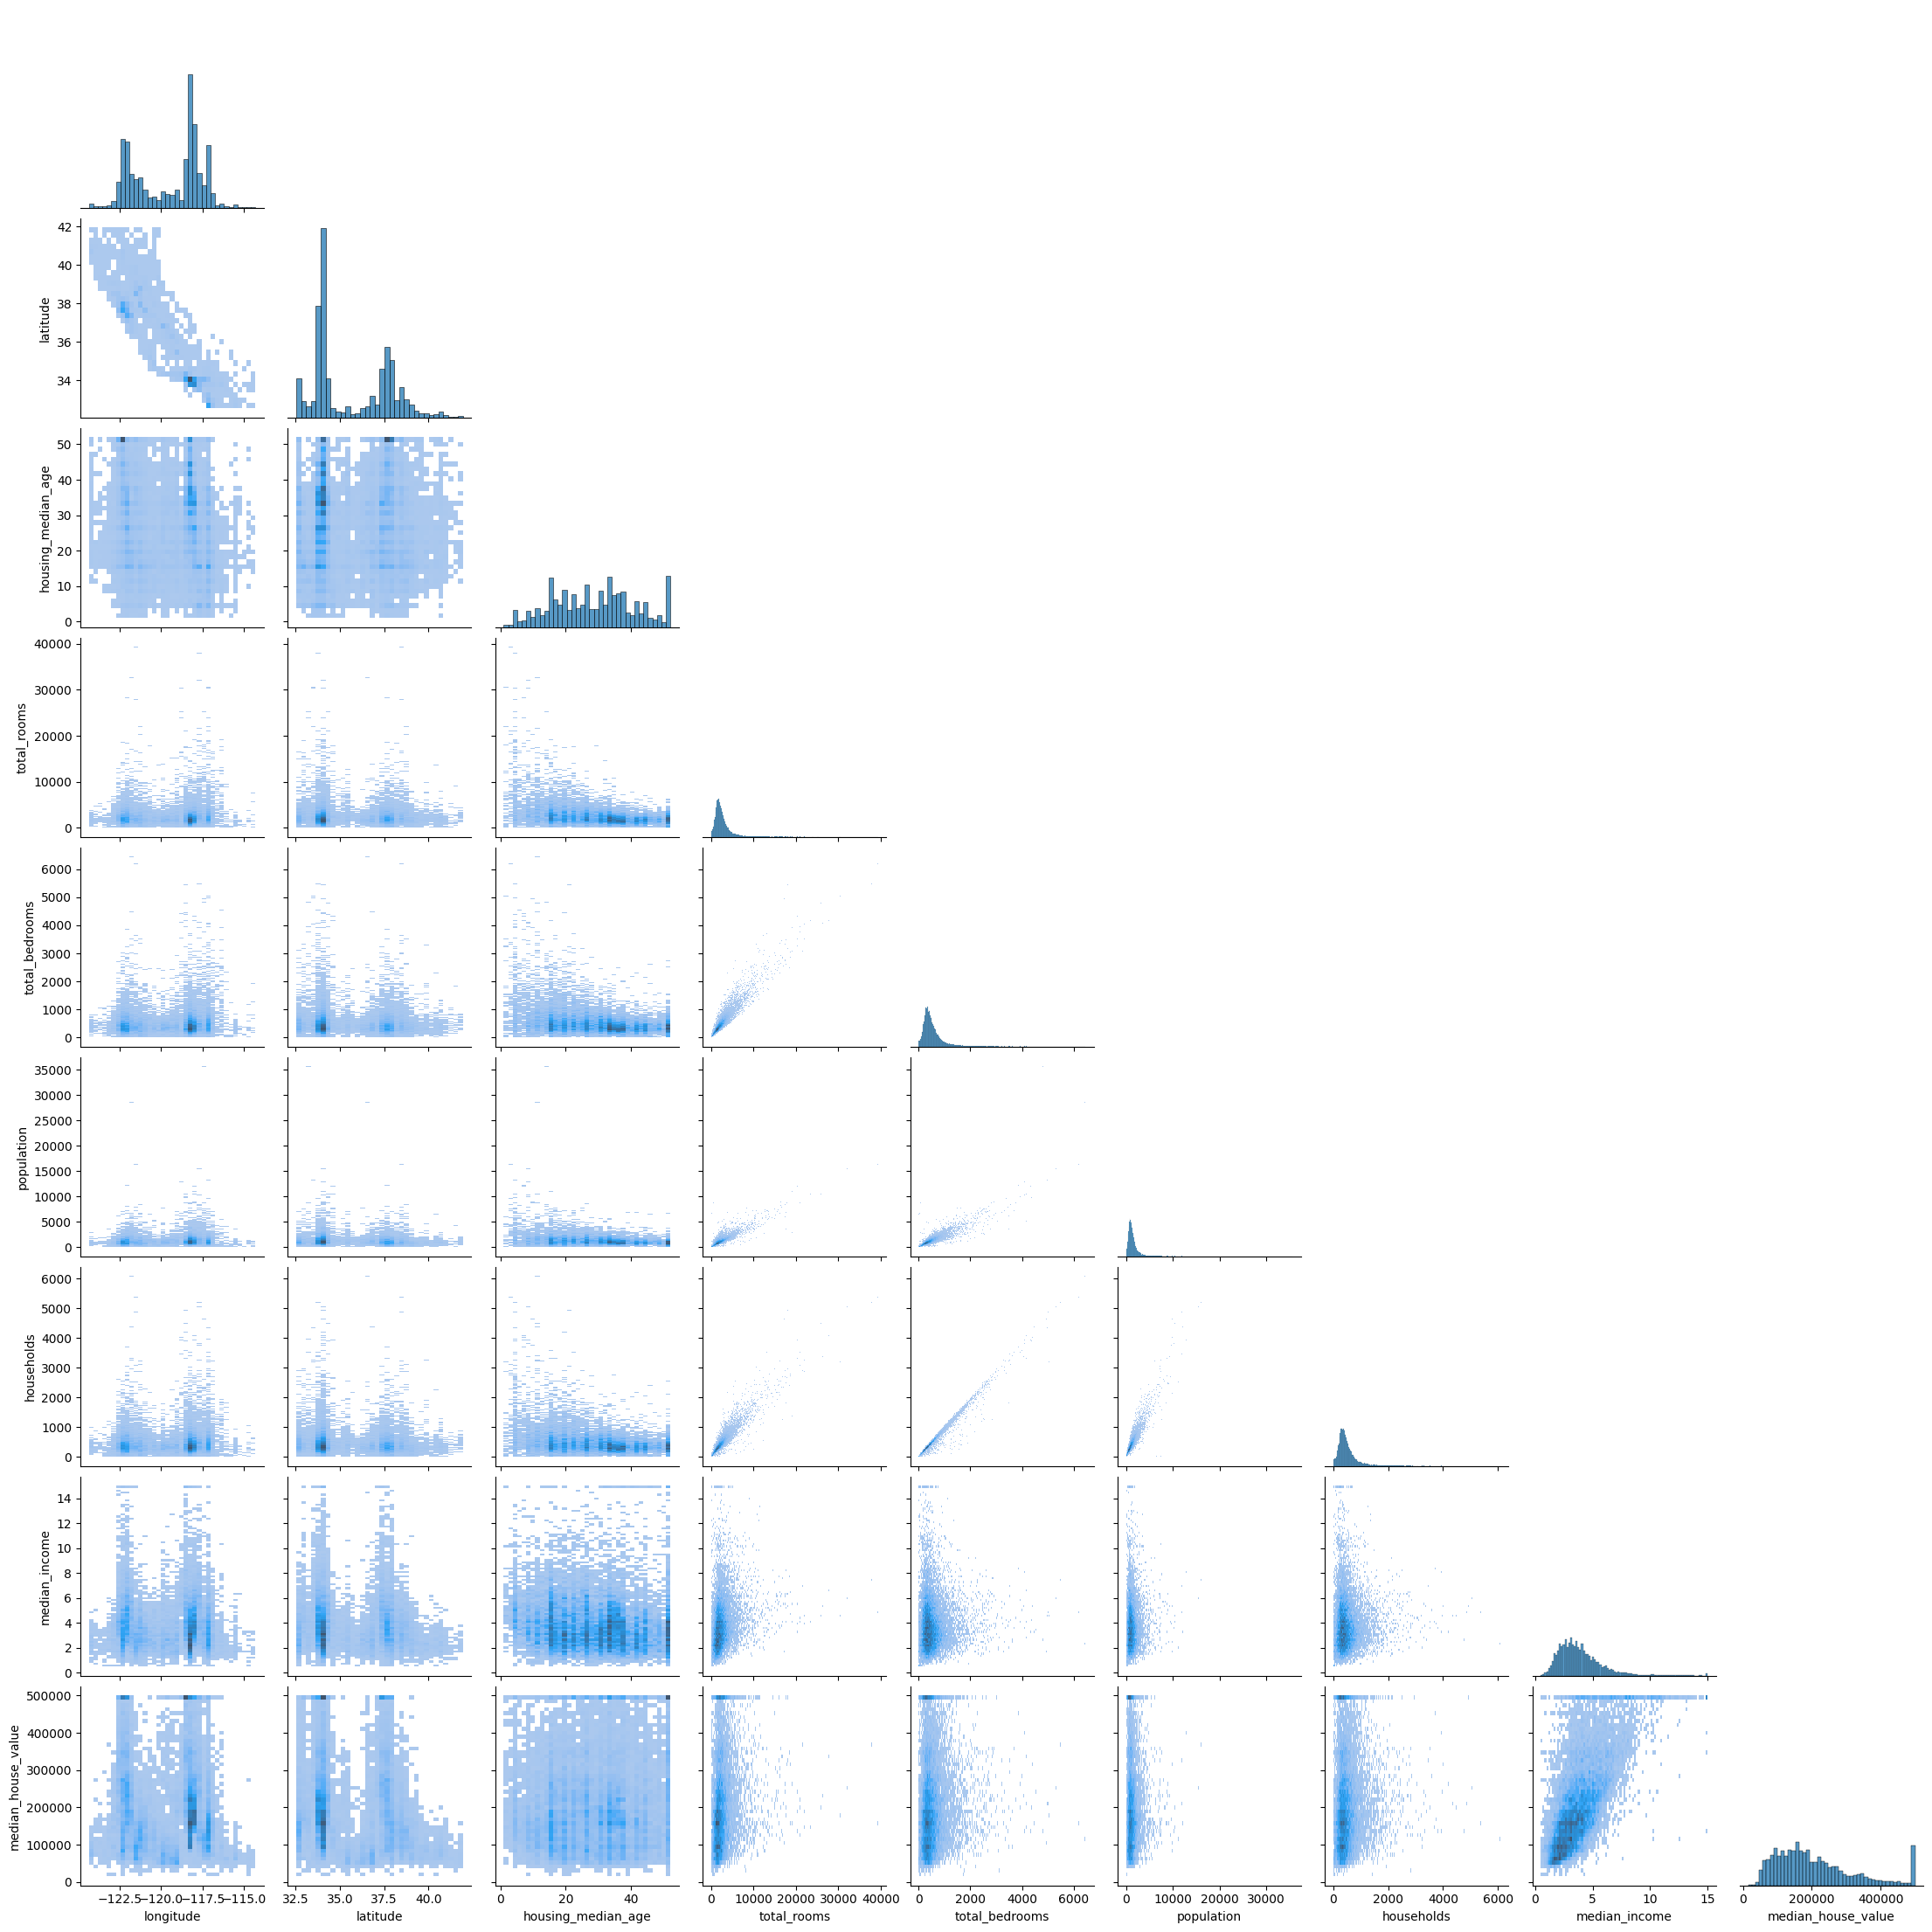

In [5]:
import seaborn as sns
sns.pairplot(df, kind="hist", corner=True ) #, kind="hist" , plot_kws={'alpha': 0.05}

Let's look at how the different attributes correlate.

<Axes: >

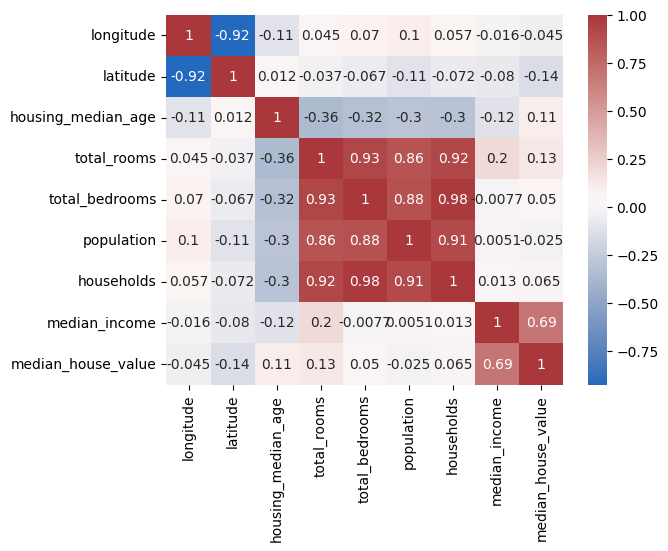

In [6]:
corr = df.corr( numeric_only=True)
sns.heatmap(corr, annot=True, cmap="vlag")

We can see that some datapoints are quite highly correlated. We may want to think about removing redundancies or potential improvements. But, that's an exercise for another time... (dimensionality reduction)

**Question:** How come latitude and longitude are so highly negatively correlated?

Let's plot the datapoints (i.e., the blocks/districts)

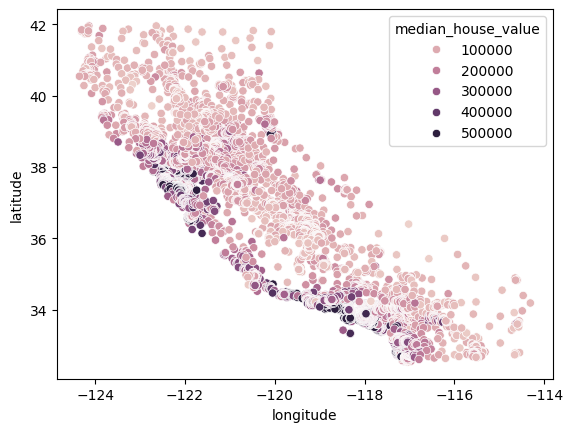

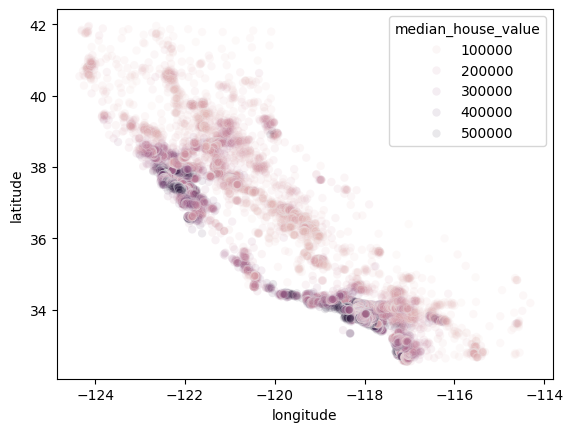

In [7]:
import matplotlib.pyplot as plt
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value', alpha=0.1)
plt.show()

In [8]:
import plotly.express as px
fig = px.scatter_geo(df, lat = "latitude", lon="longitude", color="median_house_value",  scope="usa")
fig.show()

We don't really want to deal with a categorical attribute for now. We could keep it and convert it into a numerical attribute (That has its own issues...). But for now, let's not.

In [9]:
df = df.drop("ocean_proximity", axis=1)

df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  
0           322.0       126.0         8.3252            452600.0  
1          2401.0      1138.0         8.3014            358500.0  
2           496.0       177.0         7.2574            352100.0  
3           558.0       219.0         5.6431            341300.0  
4           565.0       259.0         3.8462            342200.0  
...           ...         ...            ...                 ...  
20635       845.0       330.0         1.5603             78100.0  
20636       356.0       114.0         2.5568             77100.0  
20637      1007.0       433.0         1.7000             92300.0  
20638       741.0       349.0         1.8672             84700.0  
20639      1387.0       530.0         2.3886             89400.0  

[20433 rows x 9 columns]

## Cluster Analysis

###Hierarchicl Clustering

Let's find some trends. Let's go for 3 hypothetical different kind of housing areas.

In [94]:
# %%timeit

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3).fit(df) #fit_predict(df)

In [95]:
df["cluster_labels"] = clustering.labels_

Plot the clusters geographically

<Axes: xlabel='longitude', ylabel='latitude'>

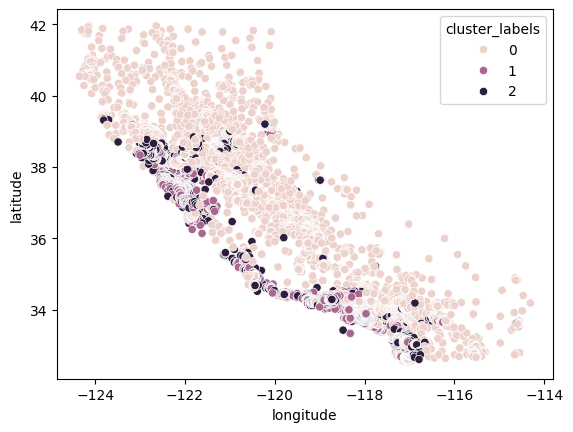

In [31]:
sns.scatterplot(x = 'longitude', y = 'latitude', hue='cluster_labels', data = df)

It would be interesting to see how the cluster assignment relates to other attributes.

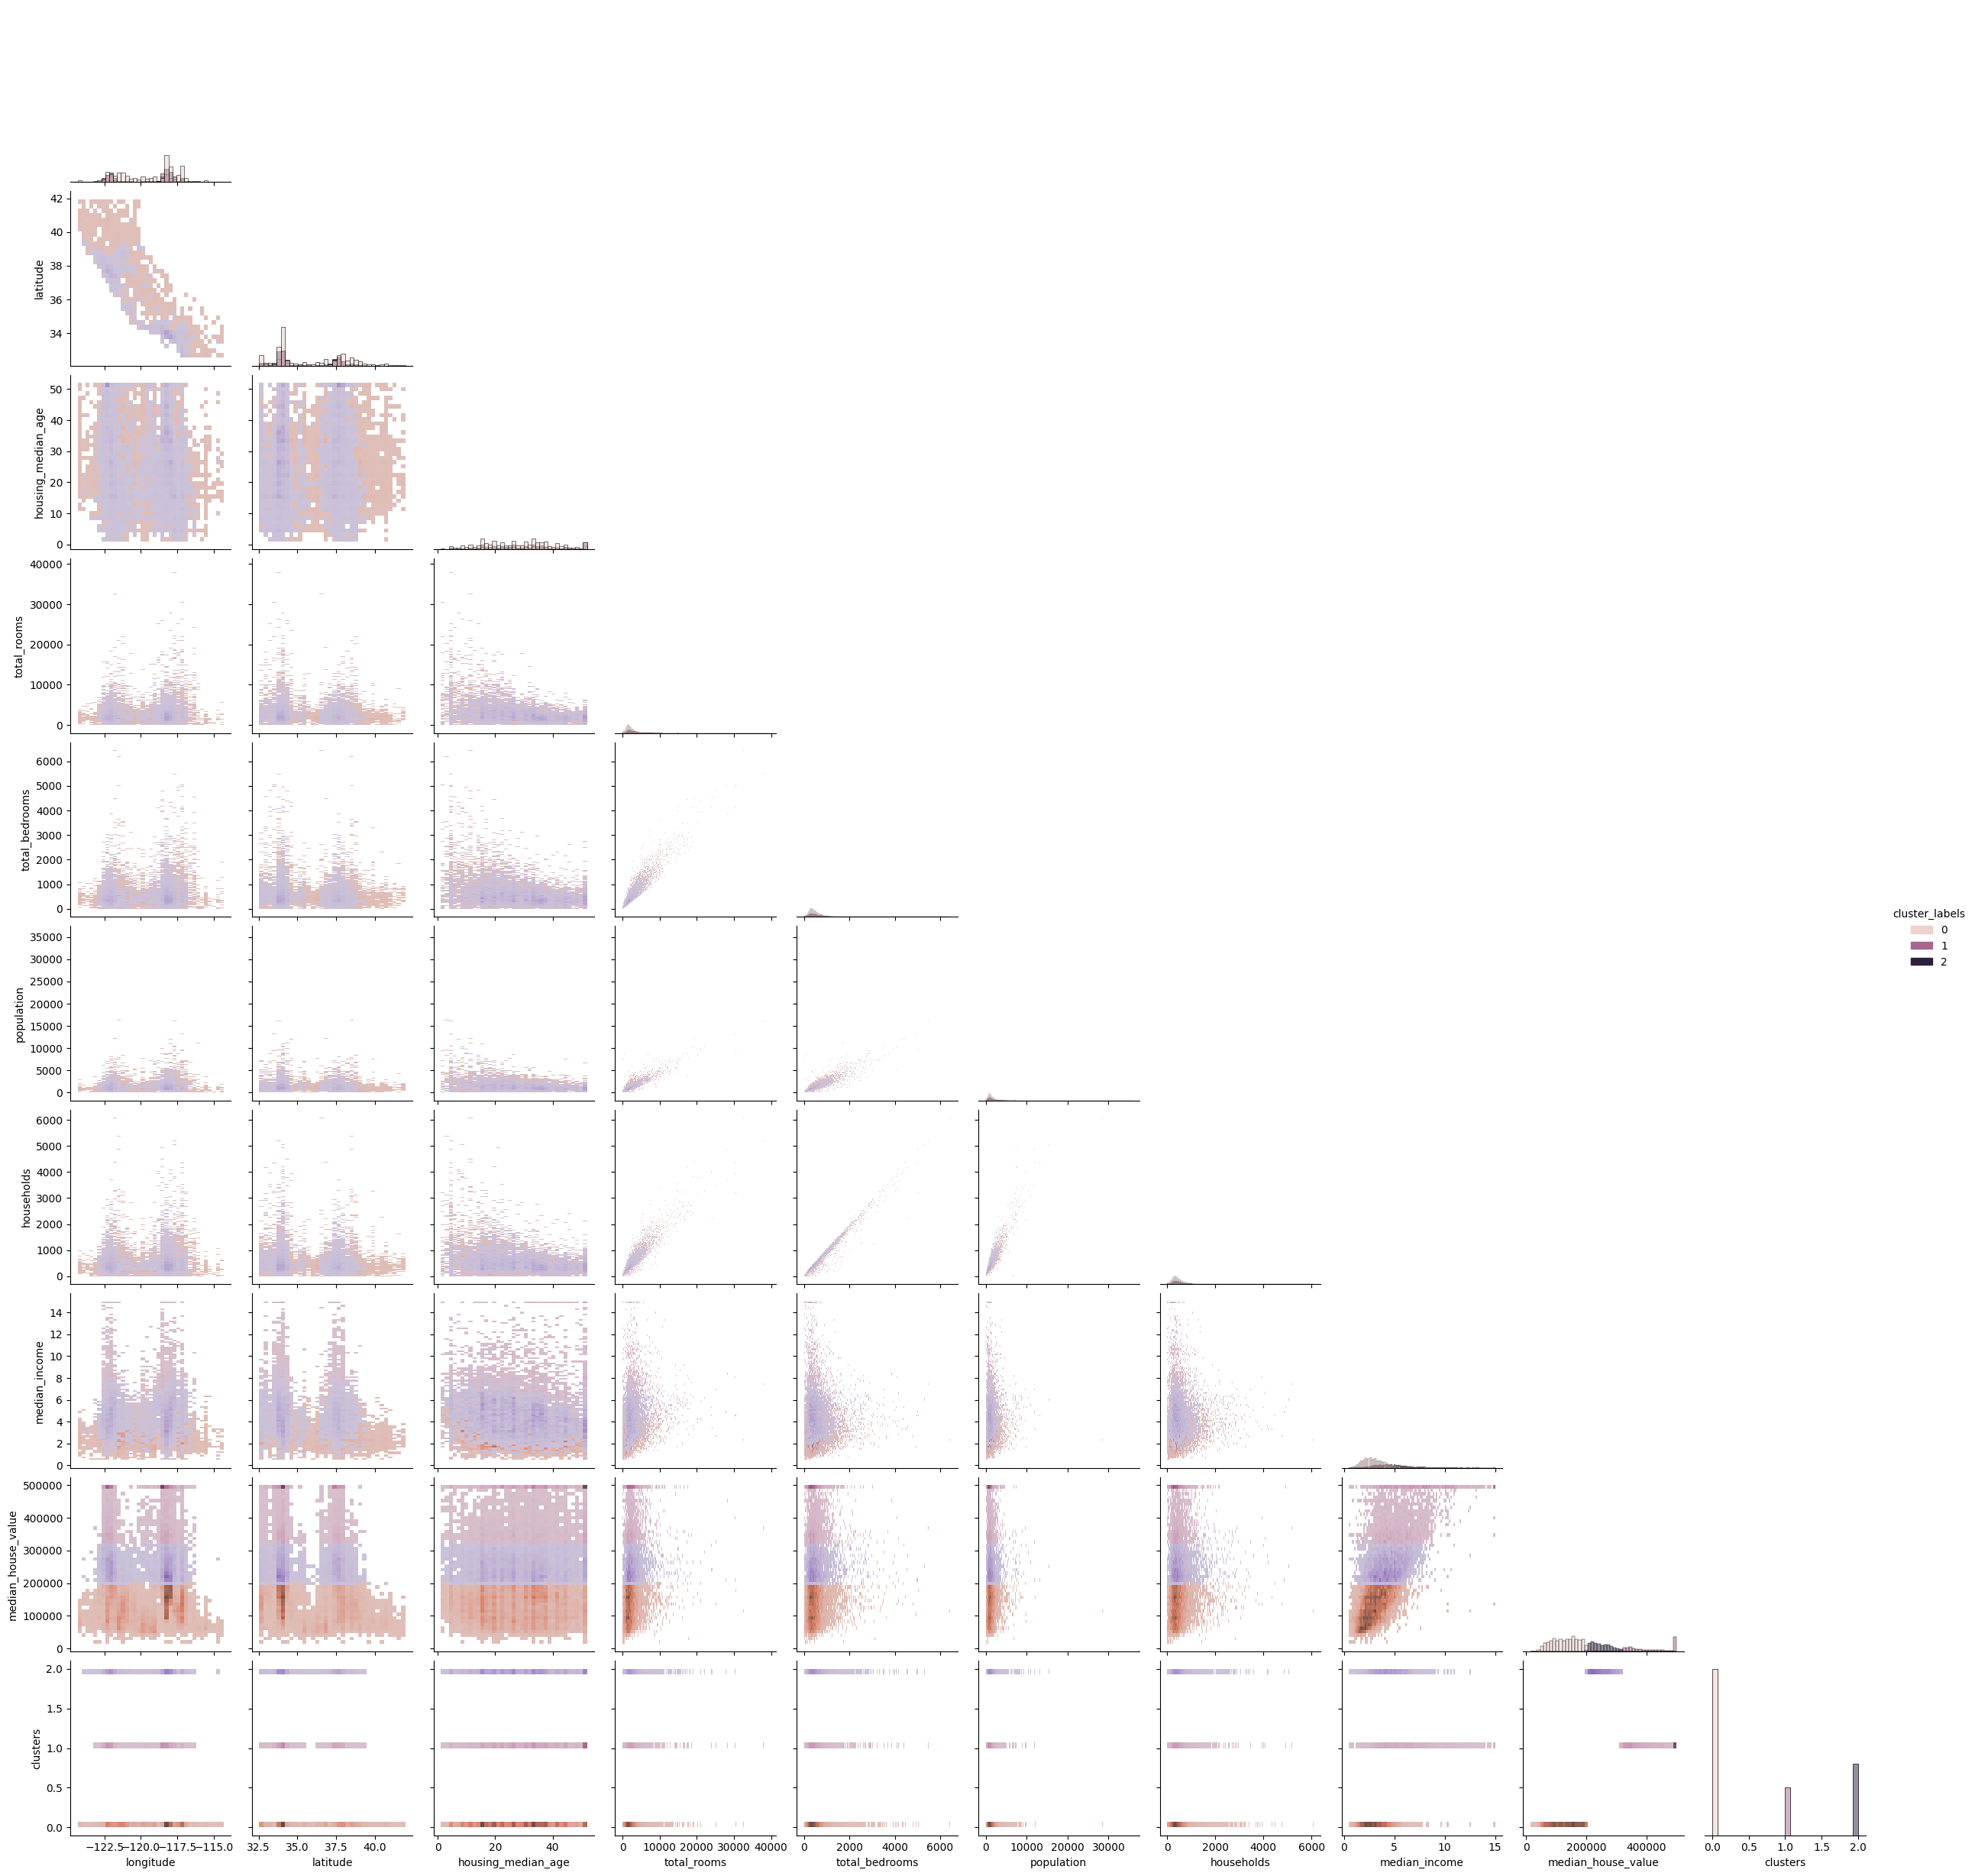

In [96]:
sns.pairplot(df, kind="hist", corner=True, hue="cluster_labels")

In [61]:
# from sklearn.metrics import silhouette_score

# # Use the continuous variable as a distance proxy


# for att in df.columns:
#   silhouette = silhouette_score(df[[att]], df['clusters'], metric='euclidean')
#   print(f"silhouette {att}: {silhouette}")

silhouette longitude: -0.016513052480712692
silhouette latitude: -0.06970672865482404
silhouette housing_median_age: -0.027973367059649028
silhouette total_rooms: 0.022226541245946665
silhouette total_bedrooms: -0.006201434694290852
silhouette population: -0.06628025287495366
silhouette households: -0.004081008978667084
silhouette median_income: 0.12880241049736557
silhouette median_house_value: 0.5492153877735594
silhouette clusters: 1.0
silhouette cluster_labels: 1.0


Seems like the clustering is heavily based on median house price. Why? How do we fix that?

### Let's try again, but with normalization this time.

In [80]:
df_normalized = df.drop('cluster_labels', axis=1)

In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = sc.fit_transform(df_normalized)

df_normalized = pd.DataFrame(normalized_data, columns=df_normalized.columns)

df_normalized

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327314  1.051717            0.982163    -0.803813       -0.970325   
1      -1.322323  1.042355           -0.606210     2.042130        1.348276   
2      -1.332305  1.037674            1.855769    -0.535189       -0.825561   
3      -1.337296  1.037674            1.855769    -0.623510       -0.718768   
4      -1.337296  1.037674            1.855769    -0.461970       -0.611974   
...          ...       ...                 ...          ...             ...   
20428  -0.758318  1.800677           -0.288535    -0.444580       -0.388895   
20429  -0.818212  1.805358           -0.844466    -0.887557       -0.920488   
20430  -0.823203  1.777272           -0.923885    -0.175042       -0.125472   
20431  -0.873115  1.777272           -0.844466    -0.355344       -0.305834   
20432  -0.833186  1.749186           -1.003304     0.067955        0.185416   

       population  households  median_income  median_house_value  
0       -0.973320   -0.976833       2.345163            2.128819  
1        0.861339    1.670373       2.332632            1.313626  
2       -0.819769   -0.843427       1.782939            1.258183  
3       -0.765056   -0.733562       0.932970            1.164622  
4       -0.758879   -0.628930      -0.013143            1.172418  
...           ...         ...            ...                 ...  
20428   -0.511787   -0.443207      -1.216727           -1.115492  
20429   -0.943315   -1.008223      -0.692044           -1.124155  
20430   -0.368826   -0.173778      -1.143171           -0.992477  
20431   -0.603564   -0.393506      -1.055136           -1.058316  
20432   -0.033487    0.079956      -0.780606           -1.017600  

[20433 rows x 9 columns]

In [82]:
df_normalized.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  2.043300e+04  2.043300e+04        2.043300e+04  2.043300e+04   
mean  -8.457103e-16  1.535632e-15        5.007495e-17 -3.407879e-17   
std    1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   
min   -2.385447e+00 -1.447937e+00       -2.194584e+00 -1.205604e+00   
25%   -1.112692e+00 -7.972780e-01       -8.444662e-01 -5.429688e-01   
50%    5.393926e-01 -6.428050e-01        2.913923e-02 -2.331597e-01   
75%    7.789699e-01  9.768213e-01        6.644886e-01  2.317829e-01   
max    2.625711e+00  2.956885e+00        1.855769e+00  1.678713e+01   

       total_bedrooms    population    households  median_income  \
count    2.043300e+04  2.043300e+04  2.043300e+04   2.043300e+04   
mean    -7.233049e-17 -8.067632e-17 -6.676661e-17   2.948858e-16   
std      1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   
min     -1.274093e+00 -1.254828e+00 -1.303810e+00  -1.775054e+00   
25%     -5.740034e-01 -5.629702e-01 -5.739976e-01  -6.884113e-01   
50%     -2.441308e-01 -2.285134e-01 -2.365573e-01  -1.762077e-01   
75%      2.589843e-01  2.621409e-01  2.735268e-01   4.595713e-01   
max      1.401871e+01  3.023088e+01  1.460297e+01   5.859665e+00   

       median_house_value  
count        2.043300e+04  
mean         1.112777e-16  
std          1.000024e+00  
min         -1.662139e+00  
25%         -7.568419e-01  
50%         -2.353266e-01  
75%          5.010323e-01  
max          2.539456e+00

Notice now how all attributes have a mean of 0 and variance 1

In [83]:
from sklearn.cluster import AgglomerativeClustering

clustering_normalized = AgglomerativeClustering(n_clusters=3).fit(df_normalized) #fit_predict(df)

In [84]:
df_normalized['cluster_labels'] = clustering_normalized.labels_

In [ ]:
# Z2 = linkage(df_normalized, 'ward')

In [ ]:
# df_normalized['cluster_labels'] = fcluster(Z2, num_clusters, criterion='maxclust')

<Axes: xlabel='longitude', ylabel='latitude'>

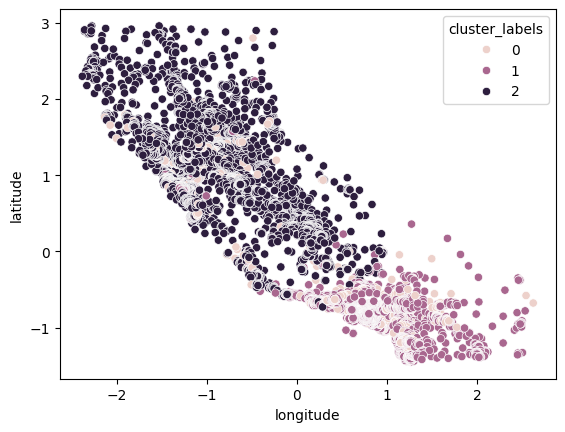

In [85]:
sns.scatterplot(x = 'longitude', y = 'latitude',
hue='cluster_labels', data = df_normalized)


It seems a lot of points are ovrlapping. How many points are there per cluster?

In [86]:
df_normalized['cluster_labels'].value_counts()

cluster_labels
1    9891
2    8530
0    2012
Name: count, dtype: int64

Not all clusters are of the same size.

Can we see any pattern in terms how the clusters relate to the attributes?

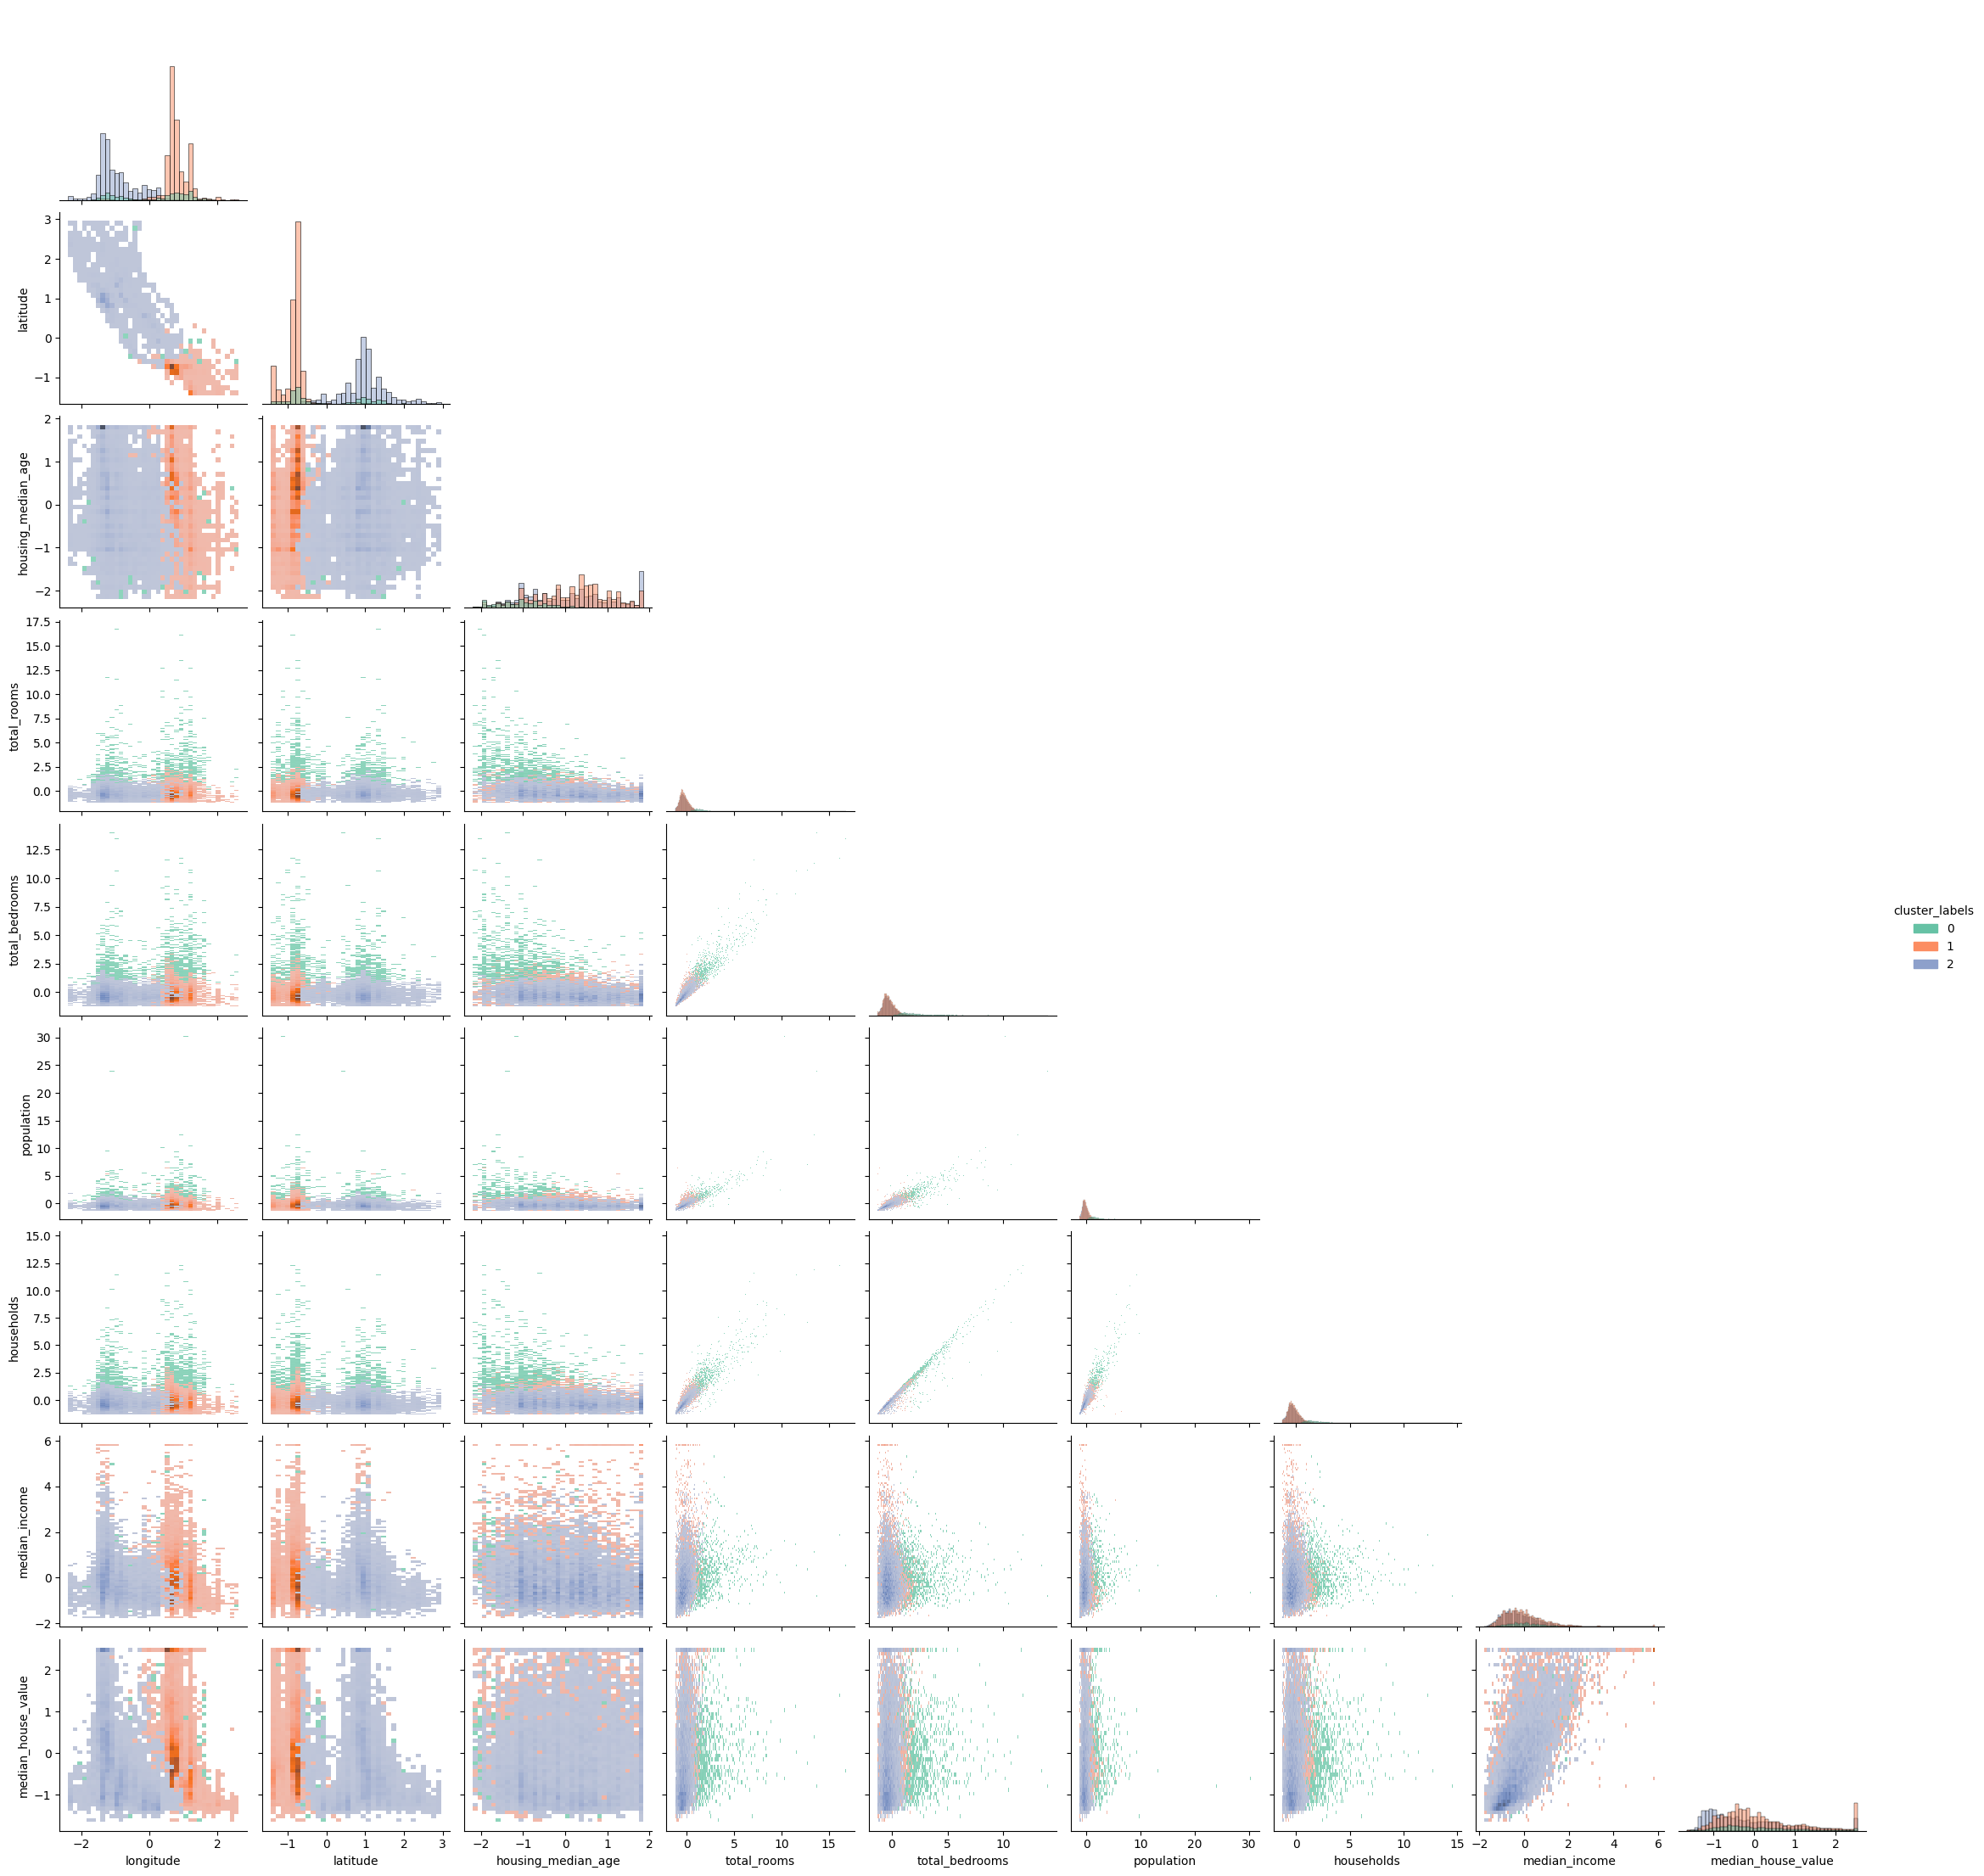

In [107]:
sns.pairplot(df_normalized, hue="cluster_labels", kind="hist", corner=True)

Looking at the interaction between location and population/households, we can see 3 somewhat distinct clusters with generally newer homes: c1 (yellow) represents densly populated areas. c2 (red) is north-western areas with a relatively low population. c3 (black) is a south-eastern areas with a relatively low population.

Let's confirm my theory in 3D!

In [110]:
import plotly.express as px
fig = px.scatter_3d(df_normalized, x='longitude', y='latitude', z='population',
              color='cluster_labels')
fig.show()

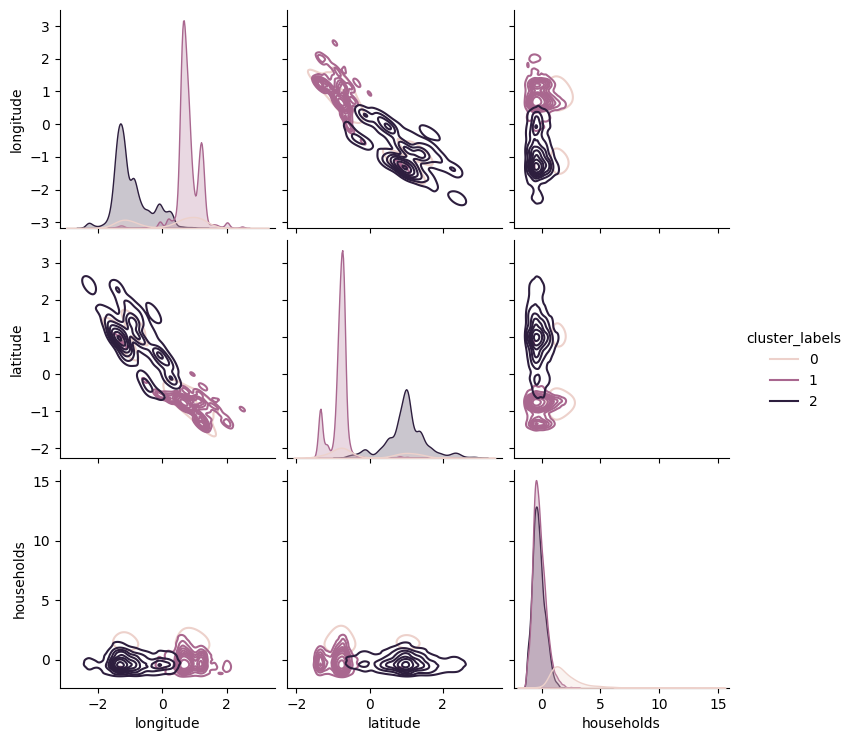

In [97]:
sns.pairplot(df_normalized[['longitude','latitude','households', 'cluster_labels']], hue="cluster_labels", kind='kde')

###Let's be more subjective about the importance of certain attributes.

Assume that 'geographical similarity' between points is the most important aspect of clustering

In [98]:
df_modified = df_normalized.copy()

df_modified.drop(['cluster_labels'], axis=1)

df_modified['longitude'] = df_modified['longitude']*3.0
df_modified['latitude'] = df_modified['latitude']*3.0

In [99]:
clustering_modified = AgglomerativeClustering(n_clusters=3).fit(df_modified) #fit_predict(df)
df_modified['cluster_labels'] = clustering_modified.labels_

<Axes: xlabel='longitude', ylabel='latitude'>

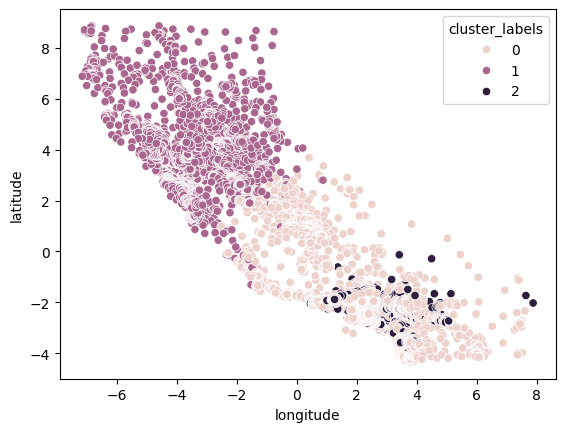

In [100]:
sns.scatterplot(x = 'longitude', y = 'latitude',
hue='cluster_labels', data = df_modified)

In [101]:
df_modified['cluster_labels'].value_counts()

cluster_labels
0    11599
1     7783
2     1051
Name: count, dtype: int64

Cluster 2 (red) only contains ~1000 blocks. It is a minor cluster.

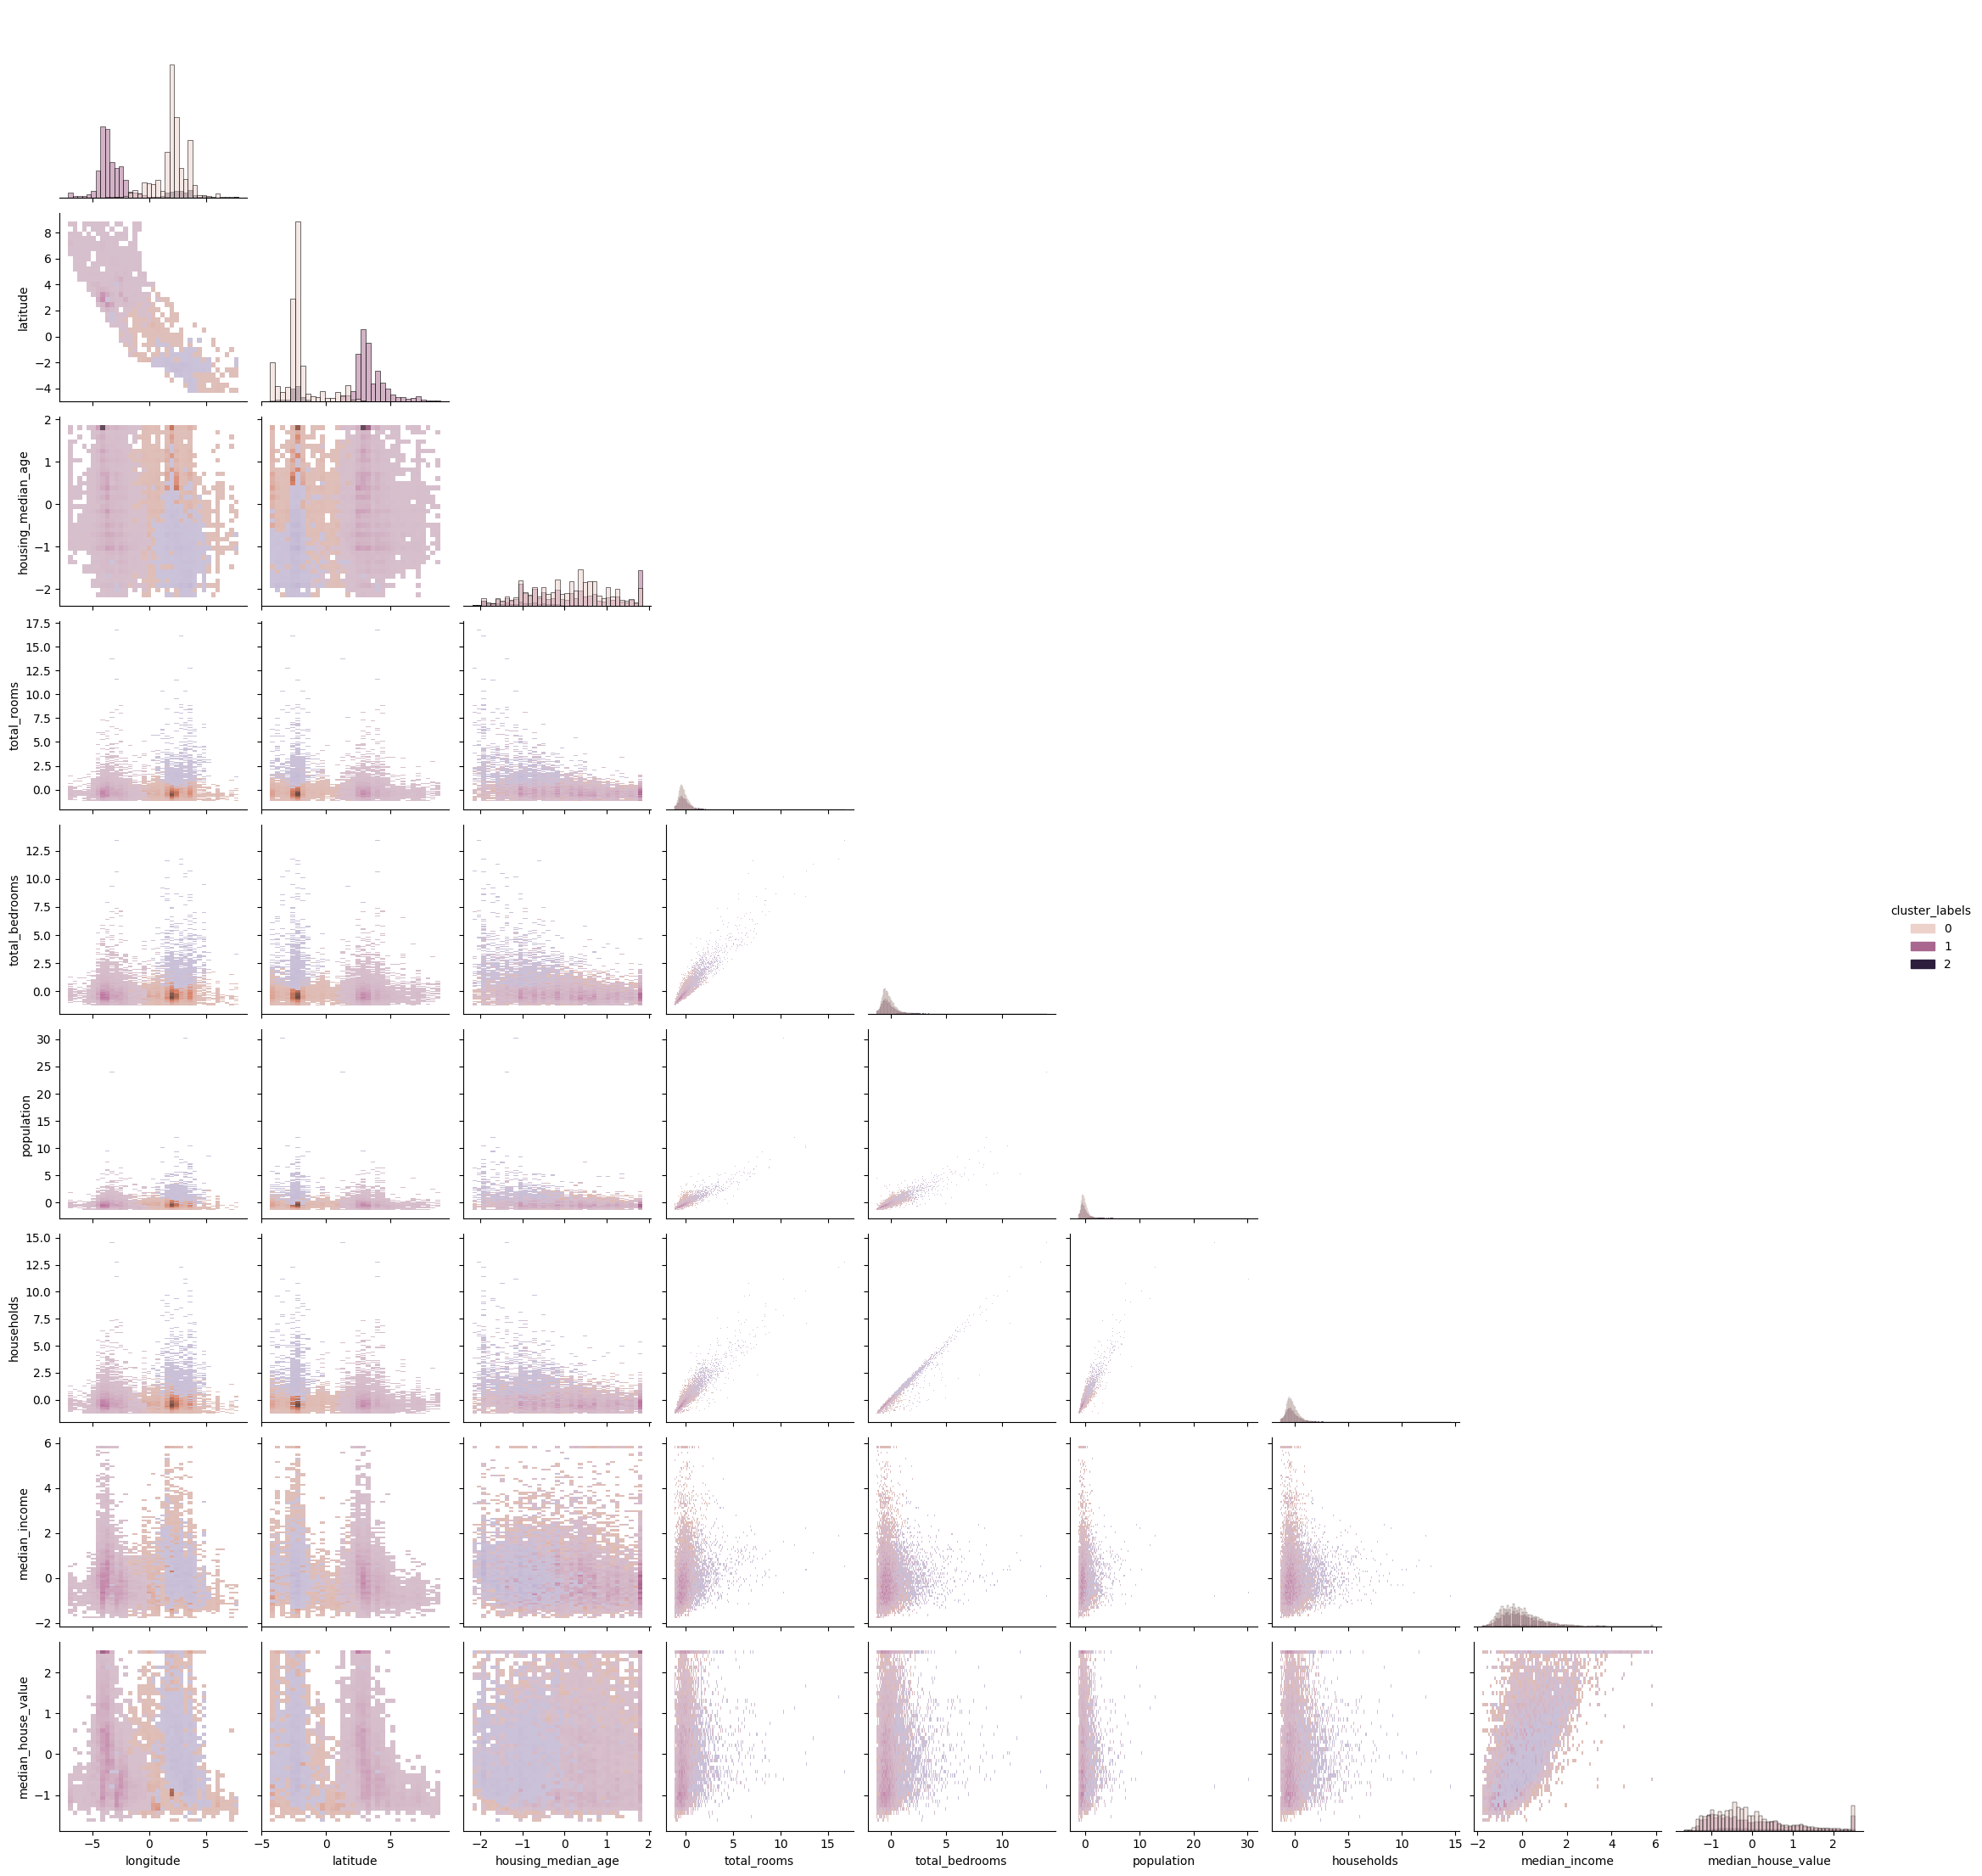

In [103]:
sns.pairplot(df_modified, hue="cluster_labels", corner=True, kind="hist")

It is obvious now that the geographic location became dominant while the other attributes became mostly irrelevant.

## Things to try:

1.   What could we have done about categorical data? Does it make sense to conver them to numbers?
2.   Maybe it is too much to ask to cluster based on all these attributes. Is there a chance to drop (or even merge) some of them?